In [1]:
import jax
import jax.numpy as jnp
import jax.random as random
import pandas as pd
import seaborn as sns

import pfjax as pf
import pfjax.experimental.stoichmodel as st
import pfjax.sde as sde

key = random.PRNGKey(0)

## Lotka-Volterra Model

In [2]:
# Stoichiometry matrix

In = jnp.array([[1,1,0],
                [0,1,1]], dtype='f')
Out = jnp.array([[2,0,0],
                 [0,2,0]], dtype='f')

# parameter values

param = jnp.array([0.5,0.0025,0.3])
tau = jnp.array([0.1,0.1])
X_init = jnp.array([100.,50.])

theta = jnp.concatenate((param, tau, X_init))

dt = 0.1
n_res = 2
n_obs = 201
lotvol_model = st.StoichModel(dt,n_res,In,Out)

x_init = jnp.block([[jnp.zeros((n_res-1, lotvol_model._n_X))],
                    [jnp.log(X_init)]])

y_meas, x_state = pf.simulate(lotvol_model, key, n_obs, x_init, theta)


Text(0.5, 1.0, 'Observations and Latent: LV')

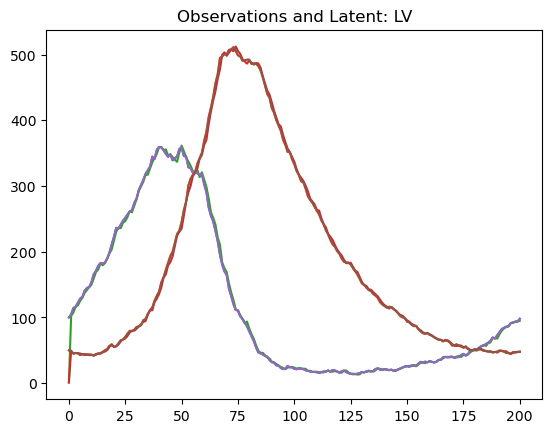

In [3]:
import matplotlib.pyplot as plt
plt.plot(y_meas[:, 0])
plt.plot(y_meas[:, 1])
plt.plot(jnp.exp(x_state[:,0]))
plt.plot(jnp.exp(x_state[:,1]))
plt.title("Observations and Latent: LV")

## Prokaryotic Gene Network Model

In [4]:
# Stoichiometry matrix

In = jnp.array([[0., 0., 0., 1., 0., 0., 1., 0.],
                [0., 0., 0., 0., 2., 0., 0., 1.],
                [1., 0., 0., 0., 0., 1., 0., 0.],
                [1., 0., 1., 0., 0., 0., 0., 0.],
                [0., 1., 0., 0., 0., 0., 0., 0.]], dtype='f')

Out = jnp.array([[0., 0., 1., 1., 0., 0., 0., 0.],
                 [0., 0., 0., 1., 0., 2., 0., 0.],
                 [0., 1., 0., 0., 1., 0., 0., 0.],
                 [0., 1., 1., 0., 0., 0., 0., 0.],
                 [1., 0., 0., 0., 0., 0., 0., 0.]], dtype='f')

# parameter values

param = jnp.array([0.1, 0.7, 0.35, 0.2, 0.1, 0.9, 0.3, 0.1])
tau = jnp.array([0.1,0.1,0.1,0.1])
X_init = jnp.array([8.,8.,8.,5.,5.])
X = jnp.array([8.,8.,8.,5.])

theta = jnp.concatenate((param, tau, X_init))

dt = 0.01
n_res = 2
n_obs = 201
pgnet_model = st.StoichModel(dt,n_res,In,Out)

x_init = jnp.block([[jnp.zeros((n_res-1, pgnet_model._n_X))],
                    [jnp.log(X)]])

y_meas, x_state = pf.simulate(pgnet_model, key, n_obs, x_init, theta)


Text(0.5, 1.0, 'Observations and Latent: PGNet')

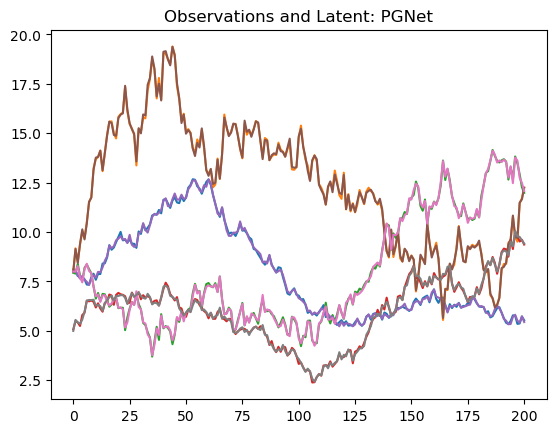

In [5]:
import matplotlib.pyplot as plt
plt.plot(y_meas[:, 0])
plt.plot(y_meas[:, 1])
plt.plot(y_meas[:, 2])
plt.plot(y_meas[:, 3])
plt.plot(jnp.exp(x_state[:,n_res,0]))
plt.plot(jnp.exp(x_state[:,n_res,1]))
plt.plot(jnp.exp(x_state[:,n_res,2]))
plt.plot(jnp.exp(x_state[:,n_res,3]))
plt.title("Observations and Latent: PGNet")

In [6]:
In = jnp.array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
                [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
                [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
                [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
                [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
                [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
                [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.]])

Out = jnp.array([[0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
                 [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
                 [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                 [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                 [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
                 [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
                 [0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
                 [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.]])
    

# parameter values

param = jnp.array([0.08, 0.82, 0.09, 0.9, 0.25, 0.1, 0.35, 0.3, 0.1, 0.1, 0.12, 0.1])
tau = jnp.array([0.12,0.15,0.31,0.17,0.09,0.16])
X_init = jnp.array([8.5,29,2,3,8,7,18,9])
I,G,Ii,Ig,i,g,ri,rg = (8.5,29,4,2,6,8,18,9)
X = jnp.array([I,G,Ii,Ig,ri,rg])

theta = jnp.concatenate((param, tau, X_init))

dt = 0.01
n_res = 2
n_obs = 201
gnet_model = st.StoichModel(dt,n_res,In,Out)

x_init = jnp.block([[jnp.zeros((n_res-1, gnet_model._n_X))],
                    [jnp.log(X)]])

y_meas, x_state = pf.simulate(gnet_model, key, n_obs, x_init, theta)


Text(0.5, 1.0, 'Observations and Latent: GNet')

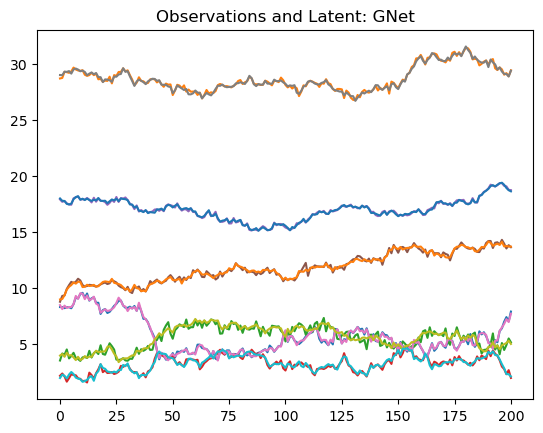

In [7]:
import matplotlib.pyplot as plt
plt.plot(y_meas[:, 0])
plt.plot(y_meas[:, 1])
plt.plot(y_meas[:, 2])
plt.plot(y_meas[:, 3])
plt.plot(y_meas[:, 4])
plt.plot(y_meas[:, 5])
plt.plot(jnp.exp(x_state[:,n_res,0]))
plt.plot(jnp.exp(x_state[:,n_res,1]))
plt.plot(jnp.exp(x_state[:,n_res,2]))
plt.plot(jnp.exp(x_state[:,n_res,3]))
plt.plot(jnp.exp(x_state[:,n_res,4]))
plt.plot(jnp.exp(x_state[:,n_res,5]))
plt.title("Observations and Latent: GNet")

In [8]:
mask = jnp.array([True,  True, False, False, True,  True, True,  True])
X = jnp.array([I,G,i,g,ri,rg])

gnet_model = st.StoichModel(dt,n_res,In,Out,mask=mask)

x_init = jnp.block([[jnp.zeros((n_res-1, gnet_model._n_X))],
                    [jnp.log(X)]])

y_meas, x_state = pf.simulate(gnet_model, key, n_obs, x_init, theta)

Text(0.5, 1.0, 'Observations and Latent: GNet')

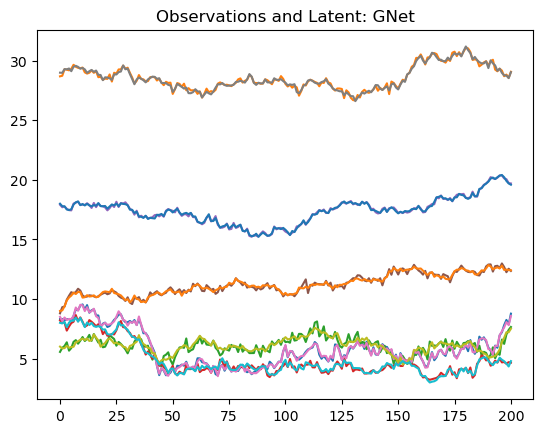

In [9]:
import matplotlib.pyplot as plt
plt.plot(y_meas[:, 0])
plt.plot(y_meas[:, 1])
plt.plot(y_meas[:, 2])
plt.plot(y_meas[:, 3])
plt.plot(y_meas[:, 4])
plt.plot(y_meas[:, 5])
plt.plot(jnp.exp(x_state[:,n_res,0]))
plt.plot(jnp.exp(x_state[:,n_res,1]))
plt.plot(jnp.exp(x_state[:,n_res,2]))
plt.plot(jnp.exp(x_state[:,n_res,3]))
plt.plot(jnp.exp(x_state[:,n_res,4]))
plt.plot(jnp.exp(x_state[:,n_res,5]))
plt.title("Observations and Latent: GNet")

In [23]:
x_recovered = jax.vmap(lambda t: gnet_model._x_full(t,X_init))(jnp.exp(x_state[:,2,:]))

Text(0.5, 1.0, 'Observations and Latent: GNet - Dependent species recovery')

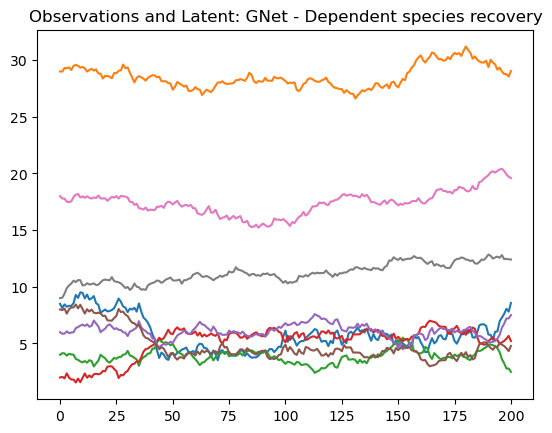

In [25]:
plt.plot((x_recovered[:,0]))
plt.plot((x_recovered[:,1]))
plt.plot((x_recovered[:,2]))
plt.plot((x_recovered[:,3]))
plt.plot((x_recovered[:,4]))
plt.plot((x_recovered[:,5]))
plt.plot((x_recovered[:,6]))
plt.plot((x_recovered[:,7]))
plt.title("Observations and Latent: GNet - Dependent species recovery")


In [26]:
jnp.exp(x_state)

DeviceArray([[[ 1.       ,  1.       ,  1.       ,  1.       ,
                1.       ,  1.       ],
              [ 8.5      , 28.999998 ,  6.       ,  8.       ,
               18.       ,  9.       ]],

             [[ 8.071233 , 29.06554  ,  5.9717903,  7.7461386,
               17.689146 ,  9.066203 ],
              [ 8.137956 , 28.987955 ,  5.85443  ,  7.946844 ,
               17.789951 ,  9.040578 ]],

             [[ 7.994232 , 29.15747  ,  5.761335 ,  7.814015 ,
               17.7267   ,  9.103543 ],
              [ 8.449134 , 29.298988 ,  5.8743653,  8.076605 ,
               17.779753 ,  9.389805 ]],

             ...,

             [[ 8.116844 , 28.783546 ,  7.077178 ,  4.665542 ,
               19.984037 , 12.558964 ],
              [ 8.059518 , 28.759962 ,  7.2089577,  4.5751395,
               19.912155 , 12.467541 ]],

             [[ 7.7186737, 28.705132 ,  7.091071 ,  4.2929735,
               19.664633 , 12.538618 ],
              [ 7.8068385, 28.54305  ,  7.2075

In [30]:
x_recovered[2,3]+x_recovered[2,5]

DeviceArray(10.000004, dtype=float32)